<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/17_non_parametric_criteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title importing libraries
from scipy import stats
import statsmodels as sts

from google.colab import drive
import pandas as pd
import numpy as np
import time
from datetime import date, datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


plt.style.use('dark_background')

def display_df(df=None):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(df)

In [2]:
#@title mounting Google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#@title reading original csv
df_2015 = pd.read_csv('gdrive/MyDrive/public_data/happiness2015.csv', sep=',')
df_2019 = pd.read_csv('gdrive/MyDrive/public_data/happiness2019.csv', sep=',')
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


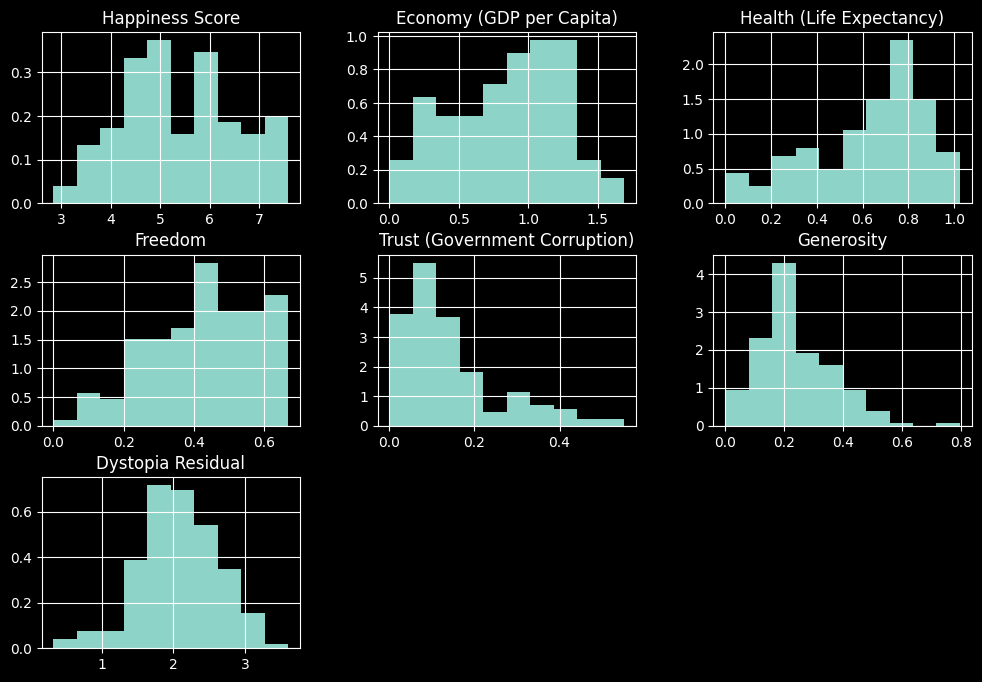

In [6]:
df_2015[['Happiness Score', 'Economy (GDP per Capita)',
         'Health (Life Expectancy)', 'Freedom',
         'Trust (Government Corruption)','Generosity',
         'Dystopia Residual']].hist(density=True, figsize=(12,8));

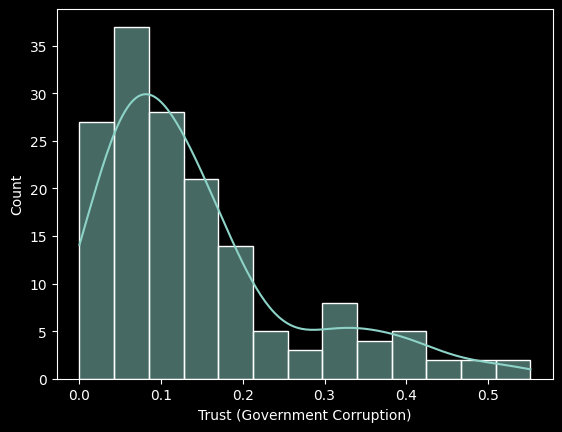

In [10]:
sns.histplot(df_2015['Trust (Government Corruption)'], kde=True,);

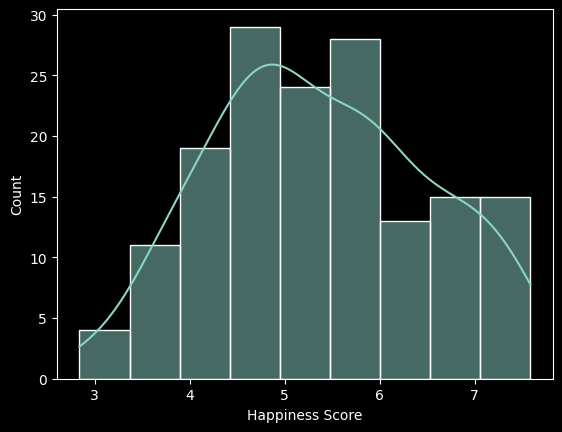

In [13]:
sns.histplot(df_2015['Happiness Score'], kde=True,);

In [14]:
#H0: Med(X) = 5
#Ha: Med(X) != 5

df_2015['Happiness Score'].describe()

,Happiness Score
count,158.000000
mean,5.375734
std,1.145010
min,2.839000
25%,4.526000
50%,5.232500
75%,6.243750
max,7.587000


In [15]:
#критерий знаков
from statsmodels.stats.descriptivestats import sign_test

x = df_2015['Happiness Score'].values
T, pvalue = sign_test(x, mu0=5)
T, pvalue
#H0 отвергается

(14.0, 0.03138663605336975)

In [16]:
#критерий Уилкоксона
_, pvalue = stats.wilcoxon(x - 5)
pvalue

#H0 отвергается

0.0003762684243784701

In [17]:
#Правда ли, что в Европе уровень счастья выше, чем в Азии?
df_2015.Region.value_counts()

,count
Region,
Sub-Saharan Africa,40
Central and Eastern Europe,29
Latin America and Caribbean,22
Western Europe,21
Middle East and Northern Africa,20
Southeastern Asia,9
Southern Asia,7
Eastern Asia,6
North America,2


In [18]:
usl = df_2015.Region.apply(lambda w: 'Asia' in w)
x_asia = df_2015[usl]['Happiness Score']
x_asia.size

22

In [19]:
usl = df_2015.Region.apply(lambda w: 'Europe' in w)
x_eur = df_2015[usl]['Happiness Score']
x_eur.size

50

In [21]:
#Ранговый критерий Мана-Уитни
#H0: f(x) = f(y)
#Ha: f(x) = f(y + delta)
stats.mannwhitneyu(x_eur, x_asia, alternative='greater')
#Гипотеза отвергается. По этим данным, в Европе люди счастливее.

MannwhitneyuResult(statistic=774.0, pvalue=0.0031457735731103722)

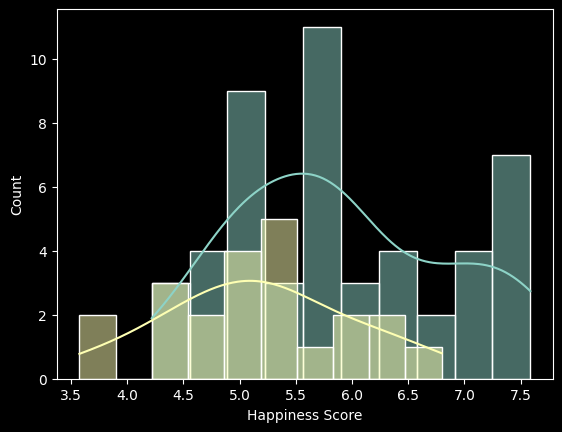

In [23]:
sns.histplot(x_eur, kde=True, bins=10);
sns.histplot(x_asia, kde=True, bins=10);

In [24]:
#Плтоности визуально различаются. Возможно, что мы использовали тест некорректно.
#Не помешает дополнительно проверить гипотезу о том, что обе выборки относятся к одному распределению:

stats.ks_2samp(x_eur, x_asia)

#на уровне значимости 5% гипотеза отвергается, но на уровне значимости 1% мы бы эту гипотезу не отвергли

KstestResult(statistic=0.36727272727272725, pvalue=0.023484023767084545, statistic_location=5.474, statistic_sign=-1)

In [26]:
#Двухвыборочные (связные выборки)
df_2015 = pd.read_csv('gdrive/MyDrive/public_data/happiness2015.csv', sep=',')
df_2015 = df_2015[['Country','Happiness Score']]
df_2015.columns = ['Country', 'Happiness_2015']
df_2015.set_index('Country', inplace=True)

df_2019 = pd.read_csv('gdrive/MyDrive/public_data/happiness2019.csv', sep=',')
df_2019 = df_2019[['Country or region','Score']]
df_2019.columns = ['Country', 'Happiness_2019']
df_2019.set_index('Country', inplace=True)

df = df_2019.join(df_2015).dropna()
df.head()



,Happiness_2019,Happiness_2015
Country,,
Finland,7.769,7.406
Denmark,7.600,7.527
Norway,7.554,7.522
Iceland,7.494,7.561
Netherlands,7.488,7.378


In [29]:
df.describe()
# медиана 2019 года выше чем в 2015
# возникает гипотеза что счастья стало в мире больше за 4 года


,Happiness_2019,Happiness_2015
count,149.000000,149.000000
mean,5.433872,5.378289
std,1.111243,1.157782
min,3.083000,2.839000
25%,4.548000,4.518000
50%,5.425000,5.253000
75%,6.198000,6.295000
max,7.769000,7.587000


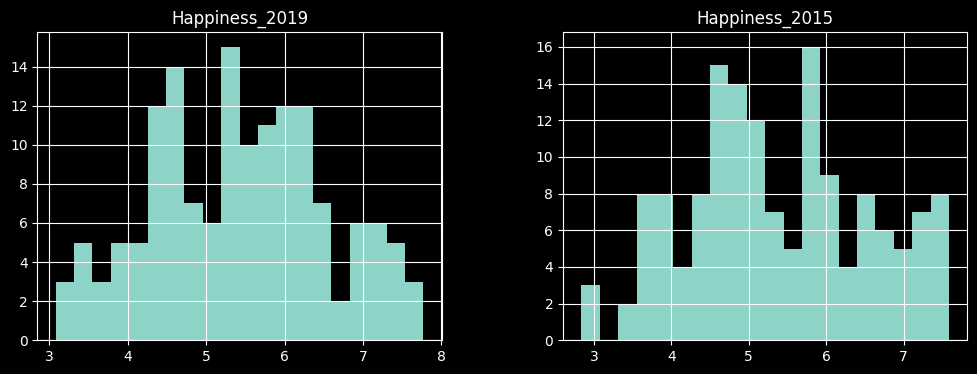

In [30]:
df.hist(figsize=(12,4), bins=20);

In [37]:
#H0: P(X>Y) = -0.5
#Ha: P(X>Y) >0.5
#используем сначала критерий знаков
_, pvalue = sign_test(df.Happiness_2019 - df.Happiness_2015)
print(pvalue)

#Гипотеза об о том, что уровень счастья не изменился, не отвергается.

0.7432690217670562


In [38]:
#а теперь Ранговый тест Уилкоксона
#H0: Med(X-Y) = 0
#Ha: Med(X-Y) != 0
stats.wilcoxon(df.Happiness_2019, df.Happiness_2015)

WilcoxonResult(statistic=4948.0, pvalue=0.22554445938820344)